# Setup

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install shap

     |████████████████████████████████| 276kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394115 sha256=2e8fb65a22dd3612ea1ea510d01f1269b225cf507e7858ba322a122fcdf623a5
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [3]:
import shap

# Preparação do Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/df_norm.csv")

In [6]:
df.columns

Index(['Unnamed: 0', 'M_mean_int', 'F_std_int', 'ano_nascimento',
       'qnt_salarios', 'companhia_mae', 'companhia_parentes_amigos',
       'companhia_sozinho', 'estado_civil_nao_declarado', 'uniao_estavel',
       'descricao_mae_escolaridade', 'ensino_fundamental_conclusao', 'publica',
       'sem_estudar_sim', 'sem_estudar_NAN', 'conhecimento_idiomas',
       'conhecimento_informatica', 'conhecimento_informatica_nan',
       'respTrabBeneficirioouPensionistadoINSS', 'respTrabEstgiooubolsa',
       'respTrabNuncatrabalhou', 'respTrabNoesttrabalhando',
       'respTrabNoinformado', 'respFinCnjuge', 'respFinIrmo',
       'respFinNoinformado', 'respFinOprprioaluno', 'preta', 'indigena',
       'res_nao_informado', 'res_quilombola', 'res_rural', 'res_urbana',
       'statusImovelFinanciado', 'statusImovelCedidoouEmprestado',
       'statusImovelNoinformado', 'statusImovelOutro',
       'statusImovelPensionatoouAlojamento', 'statusImovelPrprio',
       'trabAlunoEstgiooubolsa', 'trabAlun

In [7]:
colunas_del = ['Unnamed: 0', 
       'cluster_kmodes', 'cluster_kprototypes', 'silhouette_hamming_kmodes',
       'silhouette_hamming_kprototypes', 'silhouette_jaccard_kmodes',
       'silhouette_jaccard_kprototypes', 'silhouette_sokalmichener_kmodes',
       'silhouette_sokalmichener_kprototypes', 'silhouette_yule_kmodes',
       'silhouette_yule_kprototypes']
df = df.drop(columns = colunas_del)

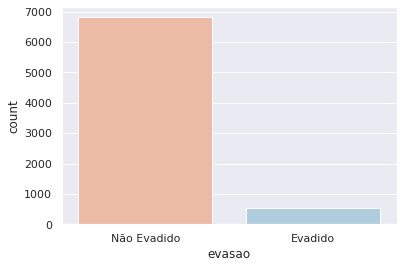

In [8]:
plt.figure()
sns.countplot(x="evasao", data=df, palette='RdBu')
plt.xticks([0,1], ['Não Evadido', 'Evadido'])
plt.show()

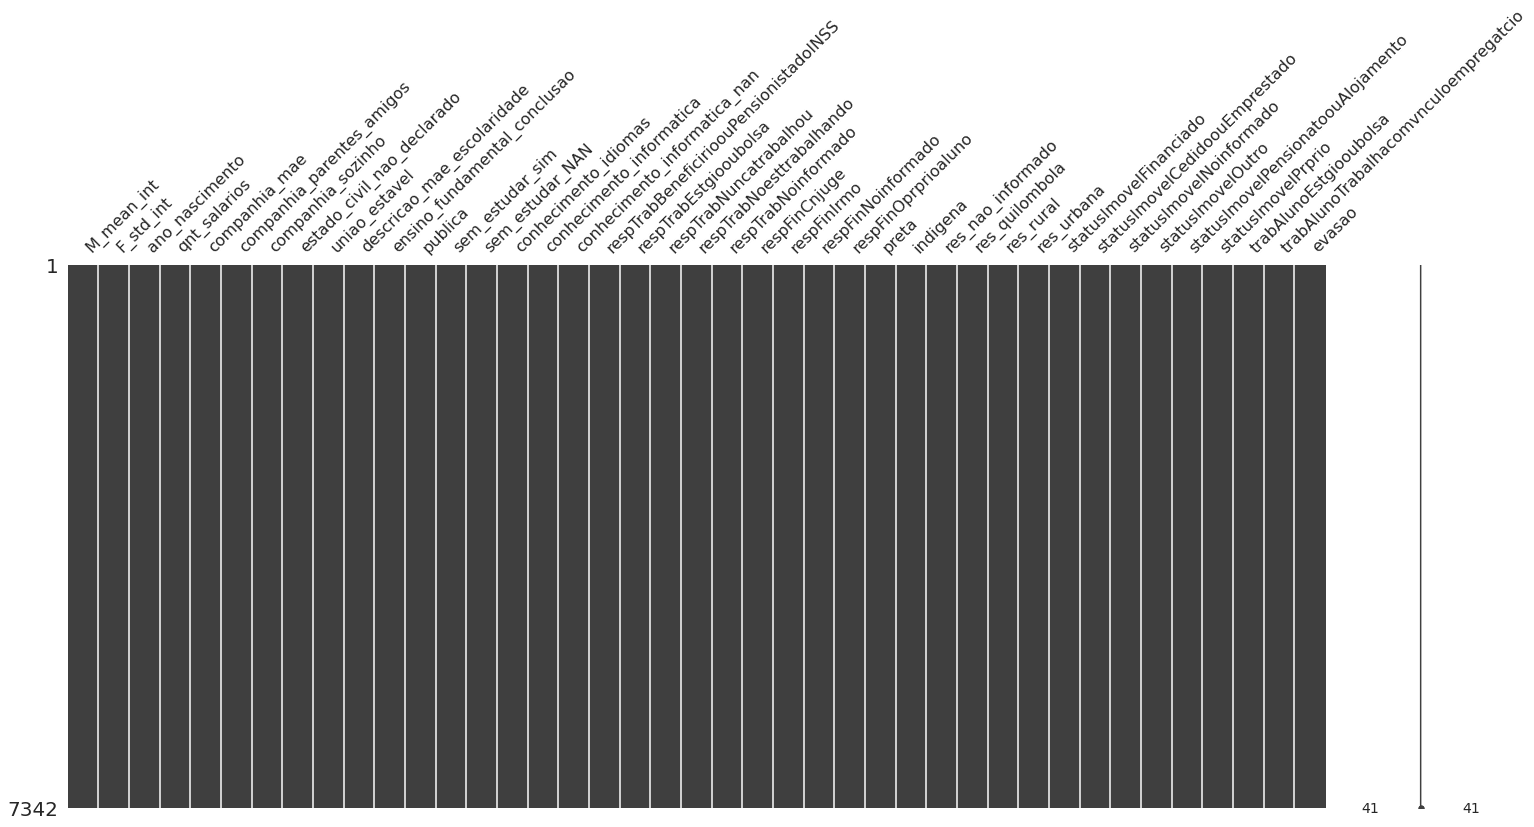

In [9]:
msno.matrix(df)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='evasao'), 
                                                    df['evasao'],
                                                    test_size=0.25, 
                                                    train_size=0.75,
                                                    random_state=42)

# Deep MLP

In [41]:
deep_mlp = keras.Sequential([
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(2, activation=tf.nn.softmax)
])

deep_mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
hist = deep_mlp.fit(X_train, y_train, 
                 epochs=600,
                 #shuffle = True,
                 #batch_size = 210,
                 validation_split = 0.20,
                 #callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
                 )

Epoch 1/600

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

138/138 [==============================] - 0s 3ms/step - loss: 23.2829 - accuracy: 0.8545 - val_loss: 0.2470 - val_accuracy: 0.9392
Epoch 2/600
138/138 [==============================] - 0s 3ms/step - loss: 1.3090 - accuracy: 0.8883 - val_loss: 1.2399 - val_accuracy: 0.9392
Epoch 3/600
138/138 [==============================] - 0s 3ms/step - loss: 0.9958 - accuracy: 0.8965 - val_loss: 0.4943 - val_accuracy: 0.9392
Epoch 4/600
138/138 [==============================] - 0s 3ms/step - loss: 1.3

In [43]:
deep_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  1312      
_________________________________________________________________
dense_11 (Dense)             multiple                  1056      
_________________________________________________________________
dense_12 (Dense)             multiple                  1056      
_________________________________________________________________
dense_13 (Dense)             multiple                  66        
Total params: 3,490
Trainable params: 3,490
Non-trainable params: 0
_________________________________________________________________


In [44]:
test_loss, test_acc = deep_mlp.evaluate(X_test, y_test, verbose=2)

58/58 - 0s - loss: 0.1472 - accuracy: 0.9395


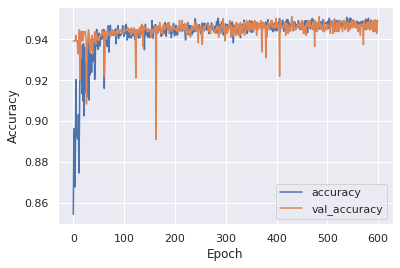

In [45]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

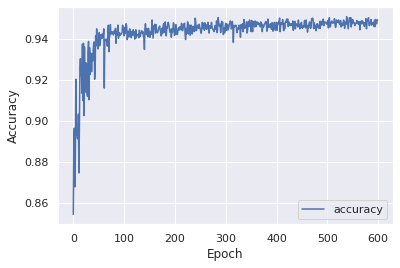

In [90]:
plt.plot(hist.history['accuracy'], label='accuracy')
#plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
predictions = deep_mlp.predict(X_test)

In [ ]:
predictions

In [48]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))
mat = tf.math.confusion_matrix(y_test, predictions_)

In [ ]:
value_ = np.array(np.array(y_test))
for i in range(len(value_)):
  print(value_[i])

In [ ]:
predictions_

Text(89.18, 0.5, 'predicted label')

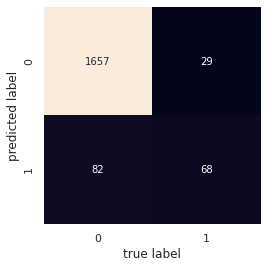

In [50]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# SHAP

In [ ]:
shap.initjs()

In [53]:
X_train_shap = shap.kmeans(X_train, 80)
X_test_shap = shap.kmeans(X_test, 80)

In [54]:
explainer = shap.KernelExplainer(deep_mlp.predict_proba, X_test_shap)

Instructions for updating:
Please use `model.predict()` instead.


In [55]:
shap_values_ex_0_0 = explainer.shap_values(X_test.iloc[0,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_0_0[1], X_test.iloc[0,:])

In [63]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_0_0[0], X_test.iloc[0,:])

In [64]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_0_0[1], X_test.iloc[0,:])

In [65]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_0_0[0], X_test.iloc[0,:])

In [66]:
shap_values_ex_0_1 = explainer.shap_values(X_test.iloc[-3,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [67]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_0_1[1],X_test.iloc[-3,:])

In [68]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_0_1[0],X_test.iloc[-3,:])

In [69]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_0_1[1],X_test.iloc[-3,:])

In [70]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_0_1[0],X_test.iloc[-3,:])

In [80]:
shap_values_ex_1_0 = explainer.shap_values(X_test.iloc[6,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [81]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_1_0[1],X_test.iloc[6,:])

In [82]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_1_0[0],X_test.iloc[6,:])

In [83]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_1_0[1],X_test.iloc[6,:])

In [84]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_1_0[0],X_test.iloc[6,:])

In [85]:
shap_values_ex_1_1 = explainer.shap_values(X_test.iloc[14,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [89]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_1_1[1],X_test.iloc[14,:])

In [87]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ex_1_1[0],X_test.iloc[14,:])

In [88]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_1_1[1],X_test.iloc[14,:])

In [86]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_ex_1_1[0],X_test.iloc[14,:])